In [2]:
import mne
import numpy as np

import os.path as op

In [4]:
# mne.datasets.sample

data_path = mne.datasets.sample.data_path()


print(data_path)

/Users/dengeman/mne_data/MNE-sample-data


In [6]:
fname = op.join(data_path, 'MEG', 'sample', 'sample_audvis_raw.fif')

In [7]:
raw = mne.io.read_raw_fif(fname)

Opening raw data file /Users/dengeman/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Current compensation grade : 0


In [10]:
raw?

In [14]:
raw.info

<Info | 24 non-empty fields
    acq_pars : str | 13886 items
    bads : list | MEG 2443, EEG 053
    ch_names : list | MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, ...
    chs : list | 376 items (GRAD: 204, MAG: 102, STIM: 9, EEG: 60, EOG: 1)
    comps : list | 0 items
    custom_ref_applied : bool | False
    description : str | 49 items
    dev_head_t : Transform | 3 items
    dig : list | 146 items
    events : list | 1 items
    experimenter : str | 3 items
    file_id : dict | 4 items
    highpass : float | 0.10000000149011612 Hz
    hpi_meas : list | 1 items
    hpi_results : list | 1 items
    lowpass : float | 172.17630004882812 Hz
    meas_date : tuple | 2002-12-03 19:01:10 GMT
    meas_id : dict | 4 items
    nchan : int | 376
    proc_history : list | 0 items
    proj_id : ndarray | 1 items
    proj_name : str | 4 items
    projs : list | PCA-v1: off, PCA-v2: off, PCA-v3: off
    sfreq : float | 600.614990234375 Hz
    acq_stim : NoneType
    ctf_head_t : NoneType
    d

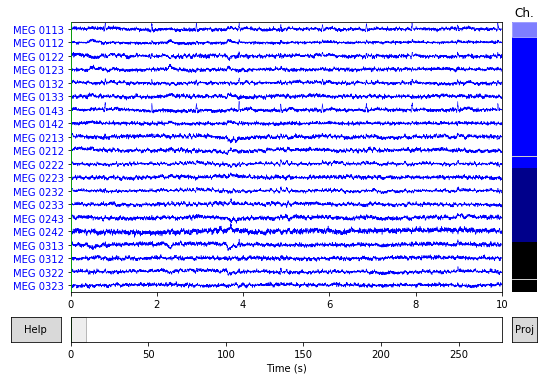

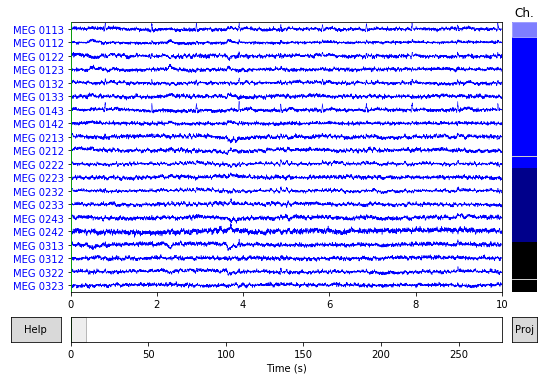

In [24]:
%matplotlib inline

raw.plot()

In [26]:
raw.set_eeg_reference('average', projection=True)  # set EEG average reference

Adding average EEG reference projection.
1 projection items deactivated


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~3.7 MB, data not loaded>

In [25]:
raw.set_eeg_reference?


In [29]:
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [30]:
type(events)

numpy.ndarray

In [31]:
events.shape

(320, 3)

In [34]:
events[:5]

array([[27977,     0,     2],
       [28345,     0,     3],
       [28771,     0,     1],
       [29219,     0,     4],
       [29652,     0,     2]])

In [35]:
event_id = {
    "aud/left": 1,
    "aud/right": 2,
    "vis/left": 3,
    "vis/right": 4
}

<ipython-input-39-31a0895dae3f>:3: RuntimeWarning: event 5 missing from event_id will be ignored
  event_id=event_id);
<ipython-input-39-31a0895dae3f>:3: RuntimeWarning: event 32 missing from event_id will be ignored
  event_id=event_id);


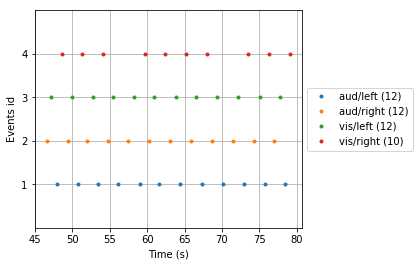

In [39]:
mne.viz.plot_events(events[:50], 
                    sfreq=raw.info['sfreq'],
                    event_id=event_id);

In [42]:
tmin = -0.2
tmax = 0.5
baseline = (None, 0)

In [54]:
epochs = mne.Epochs(raw=raw, events=events, event_id=event_id,
                    tmin=tmin, tmax=tmax, baseline=baseline,
                    reject=None)

289 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 4)
4 projection items activated


In [49]:
print(epochs.preload)
print(raw.preload)

False
False


In [50]:
raw.load_data()

Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw  |  sample_audvis_raw.fif, n_channels x n_times : 376 x 166800 (277.7 sec), ~482.1 MB, data loaded>

In [53]:
raw.get_data().shape

(376, 166800)

In [56]:
epochs.get_data().shape

Loading data for 289 events and 421 original time points ...


(289, 376, 421)

In [57]:
for epo in epochs[:10]:
    print(epo.mean())

0.00035366110117081377
0.000657016461182822
0.0003032374014976036
0.000454829154586377
0.0003537621963079818
0.0007012156965527582
0.00034112722239258014
0.0005116873820157792
0.00035377214857314004
0.0007391174760047378


In [64]:
epochs[0]  # simple index
epochs[0:2] # slice
epochs[[0, 2, 10, 2]]  # fancy index (numpy)
epochs['aud/left']  # dictionary 
epochs['left']  # hierarchical index (MNE)

<Epochs  |   145 events (all good), -0.199795 - 0.499488 sec, baseline [None, 0], ~3.7 MB, data not loaded,
 'aud/left': 72
 'vis/left': 73>

In [65]:
evoked_audleft = epochs['aud/left'].average()

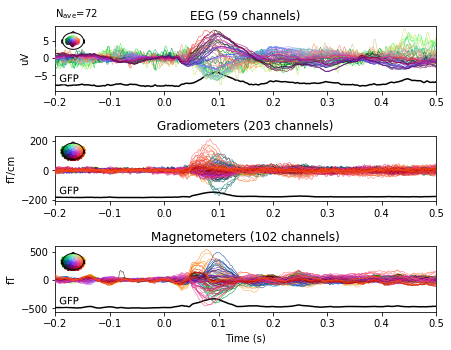

In [70]:
evoked_audleft.plot(gfp=True, spatial_colors=True);

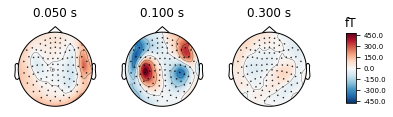

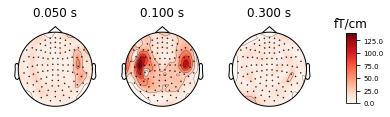

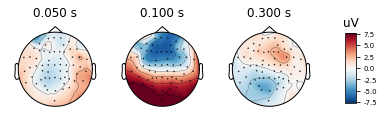

In [75]:
evoked_audleft.plot_topomap(
    ch_type='mag',
    times=[0.05, 0.1, 0.3]);
evoked_audleft.plot_topomap(
    ch_type='grad',
    times=[0.05, 0.1, 0.3]);
evoked_audleft.plot_topomap(
    ch_type='eeg',
    times=[0.05, 0.1, 0.3]);

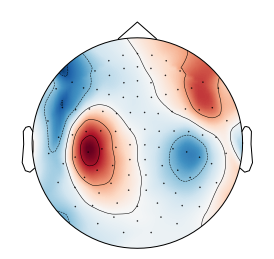

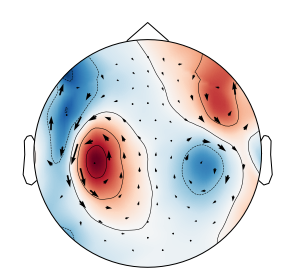

In [100]:
picks = mne.pick_types(info=evoked_audleft.info, meg='mag')

info = mne.pick_info(
    info=evoked_audleft.info,
    sel=picks)

time_idx = np.where(evoked_audleft.times >= 0.1)[0][0]

mne.viz.plot_arrowmap(
    data=evoked_audleft.data[picks, time_idx],
    info_from=info)

In [101]:
mne.pick_types?

(array([181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193,
        194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206,
        207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,
        220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
        233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245,
        246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258,
        259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271,
        272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284,
        285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297,
        298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310,
        311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323,
        324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
        337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
        350, 351, 352, 353, 354, 355, 356, 357, 358